In [ ]:
!pip install langchain langgraph langchain-google-genai google-generativeai

INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
from google.colab import userdata

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import BaseMessage, HumanMessage

from typing import TypedDict, Literal, Annotated
from pydantic import BaseModel, Field

In [ ]:
api_key = userdata.get("GOOGLE_API_KEY")

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    google_api_key=api_key
)

In [ ]:
class ChatState(TypedDict):
  messages: Annotated[list[BaseMessage], add_messages]

In [ ]:
def chat(state: ChatState) -> ChatState:
  messages = state['messages']
  response = llm.invoke(messages)

  return {'messages': [response]}

In [ ]:
graph = StateGraph(ChatState)

In [ ]:
checkpointer = MemorySaver()
graph.add_node('chat', chat)

In [ ]:
graph.add_edge(START, 'chat')
graph.add_edge('chat', END)

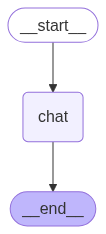

In [ ]:
chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [ ]:
initial_state = {'messages': [HumanMessage(content='What is Oncology?')]}
chatbot.invoke(initial_state)['messages'][-1].content

'Oncology is the branch of medicine that deals with the prevention, diagnosis, and treatment of cancer.  It encompasses a wide range of specialties and approaches, including surgery, radiation therapy, chemotherapy, immunotherapy, and targeted therapy.  Oncologists are doctors who specialize in treating cancer.'

In [ ]:
thread_id = '1'


while True:
  user_message = input('Type here: ')
  print(user_message)

  if user_message.strip().lower().rstrip('!') in ['exit', 'quit', 'bye']:
    print('AI: Okay, goodbye!')
    break

  config = {'configurable': {'thread_id': thread_id}}
  response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
  print(f'AI: {response["messages"][-1].content}')

Type here: Hi!
Hi!
AI: Hi there! How can I help you today?
Type here: What is Onco-Bioinformatics in 2 lines?
What is Onco-Bioinformatics in 2 lines?
AI: Onco-bioinformatics applies computational methods to analyze large biological datasets related to cancer.  This helps researchers understand cancer development, progression, and treatment response.
Type here: Bye!
Bye!
AI: Okay, goodbye!
